### IMPORTING LIBRARIES & DATASET

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('telco.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### EXPLORATORY DATA ANALYSIS

In [4]:
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1])
print('Number of Missing Values: ', df.isnull().sum().sum())
print('Number of Unique: \n', df.nunique())

Number of Rows: 7043
Number of Columns: 21
Number of Missing Values:  0
Number of Unique: 
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df = df[df['TotalCharges']!=" "]

In [7]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
uni=[]
for i in df.columns:
    if df[i].nunique()<5:
        print(i, df[i].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


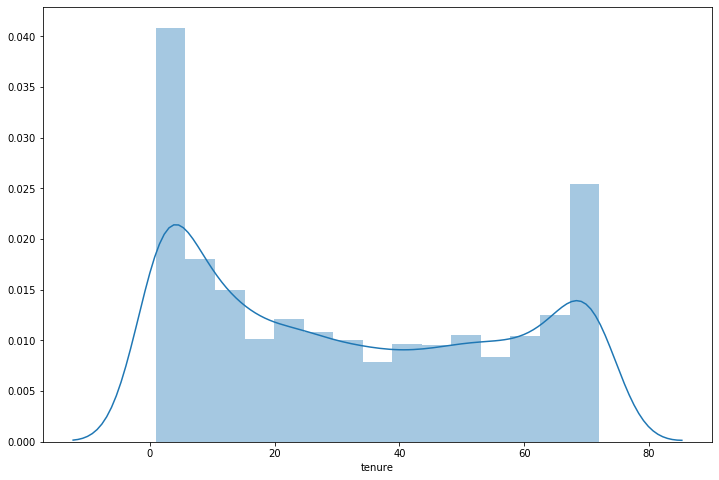

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(df['tenure'])
plt.show()

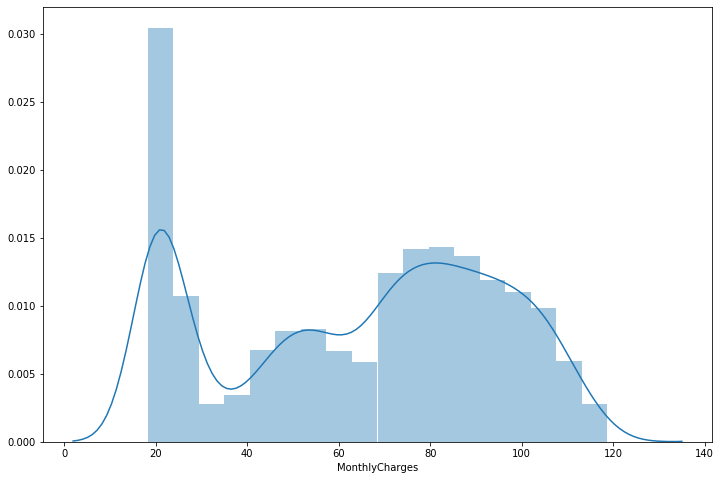

In [11]:
plt.figure(figsize=(12,8))
sns.distplot(df['MonthlyCharges'])
plt.show()

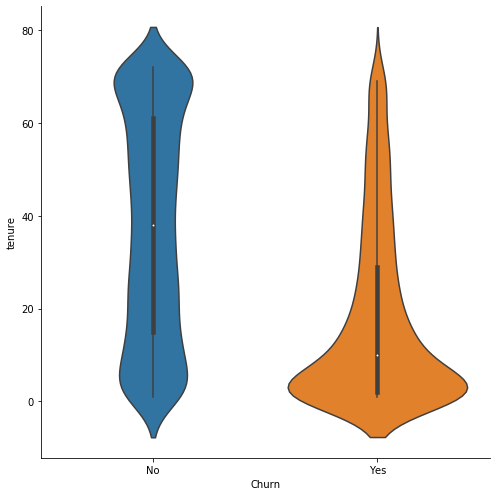

In [12]:
sns.catplot(data=df, x='Churn', y='tenure', kind='violin', height=7, aspect=1)
plt.show()

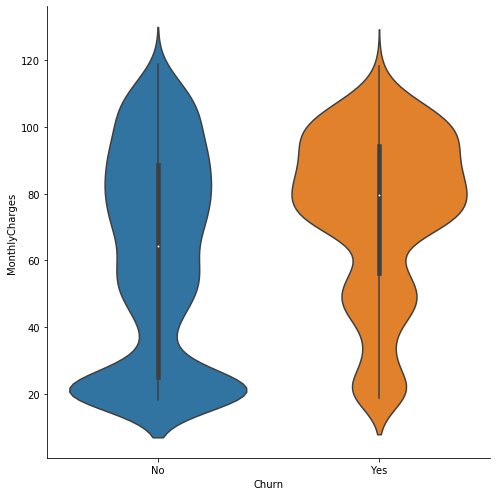

In [13]:
sns.catplot(data=df, x='Churn', y='MonthlyCharges', kind='violin', height=7, aspect=1)
plt.show()

In [14]:
cat_col=[]
for i in df.columns:
    if df[i].nunique()<10:
        cat_col.append(i)

In [15]:
cat_df = df[cat_col]

In [16]:
cat_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [17]:
temp = pd.concat([pd.crosstab(cat_df[x], cat_df['Churn']) for x in cat_df.columns[:-1]], keys=cat_df.columns).reset_index()

In [18]:
temp.columns = ['attribute1', 'attribute2', 'No', 'Yes']

In [19]:
temp['churn_rate'] = temp['Yes']/(temp['Yes']+temp['No'])

In [20]:
temp

,attribute1,attribute2,No,Yes,churn_rate
0,gender,Female,2544,939,0.269595
1,gender,Male,2619,930,0.262046
2,SeniorCitizen,0,4497,1393,0.236503
3,SeniorCitizen,1,666,476,0.416813
4,Partner,No,2439,1200,0.329761
5,Partner,Yes,2724,669,0.197171
6,Dependents,No,3390,1543,0.312791
7,Dependents,Yes,1773,326,0.155312
8,PhoneService,No,510,170,0.250000
9,PhoneService,Yes,4653,1699,0.267475


### FEATURE ENGINEERING

In [21]:
df.drop('customerID', axis=1, inplace=True)

In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
target_col = ['Churn']

In [24]:
bin_cols = df.columns[df.nunique()<3].tolist()

In [25]:
bin_cols = [x for x in bin_cols if x not in target_col]

In [26]:
cat_cols = df.columns[df.nunique()<10].tolist()

In [27]:
cat_cols = [x for x in cat_cols if x not in target_col + bin_cols]

In [28]:
num_cols = [x for x in df.columns if x not in cat_cols+target_col+bin_cols]

In [29]:
target_col, num_cols, bin_cols, cat_cols

(['Churn'],
 ['tenure', 'MonthlyCharges', 'TotalCharges'],
 ['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'PaperlessBilling'],
 ['MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaymentMethod'])

In [30]:
scale = StandardScaler()

In [31]:
num_cols_std = scale.fit_transform(df[num_cols])

In [32]:
num_cols_std  = pd.DataFrame(num_cols_std, columns=num_cols)

In [33]:
encoder = LabelEncoder()

In [34]:
for i in bin_cols:
    num_cols_std[i] = encoder.fit_transform(df[i])

In [35]:
num_cols_std

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling
0,-1.280248,-1.161694,-0.994194,0,0,1,0,0,1
1,0.064303,-0.260878,-0.173740,1,0,0,0,1,0
2,-1.239504,-0.363923,-0.959649,1,0,0,0,1,1
3,0.512486,-0.747850,-0.195248,1,0,0,0,0,0
4,-1.239504,0.196178,-0.940457,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,1,0,1,1,1,1
7028,1.612573,1.276493,2.241056,0,0,1,1,1,1
7029,-0.872808,-1.170004,-0.854514,0,0,1,1,0,1
7030,-1.158016,0.319168,-0.872095,1,1,1,0,1,1


In [36]:
cat_cols_dum = pd.get_dummies(df[cat_cols])

In [37]:
num_cols_std.shape, cat_cols_dum.shape

((7032, 9), (7032, 31))

In [38]:
cat_cols_dum.reset_index(drop=True, inplace=True)
num_cols_std.reset_index(drop=True, inplace=True)

In [39]:
df_final = pd.concat([num_cols_std, cat_cols_dum], axis=1, )

In [40]:
df_final.shape, df['Churn'].shape

((7032, 40), (7032,))

In [41]:
y = encoder.fit_transform(df['Churn'])

In [42]:
X = df_final

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

### MODEL BUILDING

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### I Logistics Regression

In [45]:
model_log = LogisticRegression()

In [46]:
model_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_log_pred = model_log.predict(X_test)

In [48]:
print("Accuracy Score :", accuracy_score(y_test, y_log_pred)), print("Confusion Matrix: \n", confusion_matrix(y_test, y_log_pred))

Accuracy Score : 0.8100113765642776
Confusion Matrix: 
 [[1156  135]
 [ 199  268]]


(None, None)

In [49]:
print(classification_report(y_test, y_log_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1291
           1       0.67      0.57      0.62       467

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.74      1758
weighted avg       0.80      0.81      0.81      1758



### II Random Forest Classification

In [50]:
model_rfc = RandomForestClassifier()

In [51]:
model_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_rfc_pred = model_rfc.predict(X_test)

In [53]:
print("Accuracy Score :", accuracy_score(y_test, y_rfc_pred)), print("Confusion Matrix: \n", confusion_matrix(y_test, y_rfc_pred))

Accuracy Score : 0.7957906712172924
Confusion Matrix: 
 [[1158  133]
 [ 226  241]]


(None, None)

In [54]:
print(classification_report(y_test, y_rfc_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1291
           1       0.64      0.52      0.57       467

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



### XG Boost

In [56]:
model_xgb = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1)

In [57]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.08, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
y_xgb_pred = model_xgb.predict(X_test)

In [59]:
accuracy_score(y_test, y_xgb_pred)

0.8088737201365188

In [60]:
confusion_matrix(y_test, y_xgb_pred)

array([[1157,  134],
       [ 202,  265]], dtype=int64)

In [61]:
print(classification_report(y_test, y_xgb_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1291
           1       0.66      0.57      0.61       467

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758



### IV Artificial Neural Network

In [62]:
model_ann = Sequential()

In [63]:
model_ann.add(Dense(input_dim=40, units=64, activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(units=64, activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(units=64, activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(units=32, activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(units=1, activation='sigmoid'))
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
model_ann.fit(X_train, y_train, batch_size=50, epochs=35, validation_data=(X_test, y_test))

Epoch 1/35
106/106 [==============================] - 0s 3ms/step - loss: 0.5139 - accuracy: 0.7419 - val_loss: 0.4387 - val_accuracy: 0.7878
Epoch 2/35
106/106 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.7759 - val_loss: 0.4304 - val_accuracy: 0.7952
Epoch 3/35
106/106 [==============================] - 0s 3ms/step - loss: 0.4398 - accuracy: 0.7907 - val_loss: 0.4165 - val_accuracy: 0.8072
Epoch 4/35
106/106 [==============================] - 0s 3ms/step - loss: 0.4346 - accuracy: 0.7943 - val_loss: 0.4169 - val_accuracy: 0.8038
Epoch 5/35
106/106 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.7950 - val_loss: 0.4240 - val_accuracy: 0.8055
Epoch 6/35
106/106 [==============================] - 0s 4ms/step - loss: 0.4323 - accuracy: 0.7986 - val_loss: 0.4262 - val_accuracy: 0.8049
Epoch 7/35
106/106 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.8034 - val_loss: 0.4118 - val_accuracy: 0.8077
Epoch 

In [65]:
y_ann_pred = model_ann.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [66]:
accuracy_score(y_test, y_ann_pred)

0.7918088737201365

In [67]:
confusion_matrix(y_test, y_ann_pred)

array([[1124,  167],
       [ 199,  268]], dtype=int64)

In [68]:
print(classification_report(y_test, y_ann_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1291
           1       0.62      0.57      0.59       467

    accuracy                           0.79      1758
   macro avg       0.73      0.72      0.73      1758
weighted avg       0.79      0.79      0.79      1758



In [70]:
# XGB performs slightly better than other model. Better Feature Engineer can improve our accuracy even much better.